In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Test algo dichotomie & correlation

Tentative pour identifier les intervalles linéaires, ayant un bon coefficient de corrélation (de Pearson)

https://en.wikipedia.org/wiki/Correlation_and_dependence#Pearson.27s_product-moment_coefficient

### Load test data

Depuis le site : https://fred.stlouisfed.org/series/DCOILBRENTEU/downloaddata

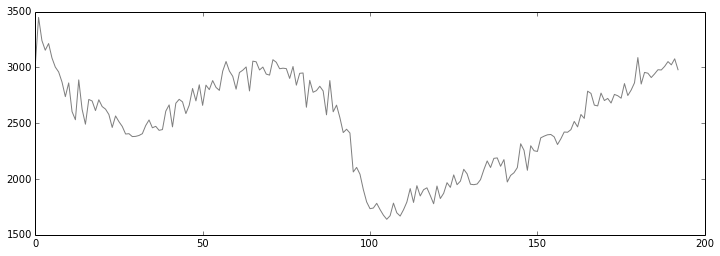

In [7]:
#import datetime
#sDate = '2014-05-06'
#dtDate = datetime.datetime.strptime(sDate,"%m-%d-%Y")

def txt2float( s ):
    if s == '.':
        return 0.0
    else:
        return float(s)

# src  https://fred.stlouisfed.org/series/DCOILBRENTEU/downloaddata
#fname = 'data/DCOILBRENTEU.csv'

# https://fred.stlouisfed.org/series/JTSQUL
fname = 'data/JTSQUL.csv'

#https://fred.stlouisfed.org/series/PRS30006013#0
#fname = 'data/PRS30006013.csv'

# https://fred.stlouisfed.org/series/TTLCONS
#fname = 'data/TTLCONS.csv'

#converters = { 1:float}
data = np.loadtxt(fname, dtype='str', comments='#', delimiter=',',  skiprows=1)

Y = np.array( [ float(u[1]) for u in data ])

plt.figure(figsize=(12, 4)  )
plt.plot( Y,  'k-', alpha=0.5 )

X = np.array( range(len(Y)) )

### Algo dichotomie et Coefficient de corrélation

In [14]:
import scipy.stats as stats

def look4Cor(X, Y, k_min=10, Rzero = 0.56):
    # k_min:  longueur minimal pour faire une regression 
    # Rzero: coef de correlation minimal (au carré) accepté comme valide
    
    n = len(X)
    if n<k_min:
        return []
        
    cor, p = stats.pearsonr( X, Y )

    if cor**2 > Rzero:
        print cor**2
        return [[0, n]]
    else:
        m = int( n/2.0  )
        # coupe l'interval en deux sous intervals Left & Right:
        Xleft, Yleft = X[:m], Y[:m]
        Xright, Yright = X[m:], Y[m:]

        I_left = look4Cor(Xleft, Yleft)
        I_right = look4Cor(Xright, Yright)
        if I_right:  # translate l'indice
            I_right = [ [u[0]+m, u[1]+m] for u in I_right ]
     
        return I_left + I_right
     

0.725917078058
0.598737761576
0.584447279439
0.766070851133
0.918858228218
[[0, 24], [36, 48], [48, 60], [72, 96], [96, 193]]


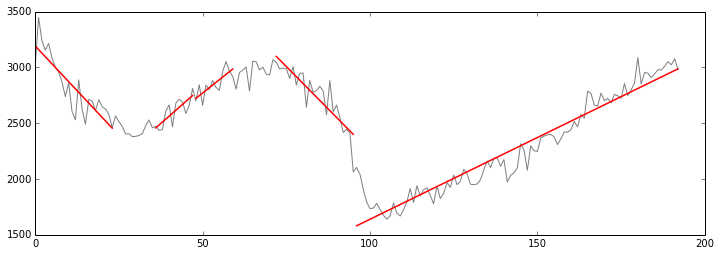

In [18]:
Intervals = look4Cor(X, Y)

print Intervals

# regression linéaire:
def regres(X, Y):
    a, b =  np.polyfit( X, Y, 1, full=False)
    
    Yfit = a*X + b
    SCR = np.sum( (Y-Yfit )**2 ) #somme des carrés des résidu
    
    return a, b, Yfit, SCR

# Plot :
plt.figure(figsize=(12, 4)  )
plt.plot( X, Y,  'k-', alpha=0.5 )

for i, j in Intervals:
    Xij, Yij = X[i:j], Y[i:j]
    a, b, Yfit, scr = regres(Xij, Yij)
    
    plt.plot( Xij, Yfit, '-r', lw=1.5)

#### Problemes:
 * trends data -> Good correlation, 
 * and non linear data
 * Choix de R_zero ??
 * Gestion des 'merges' entre deux intervalles coupés sans raisons